In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import linalg

In [25]:
trainDf = pd.read_csv("dataset/train.csv")
testDf = pd.read_csv("dataset/test.csv")
trainingSetIndex = len(trainDf)

In [26]:
trainDf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
trainDf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [28]:
print(trainDf.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [29]:
combination = trainDf.append(testDf)
combination = combination.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)

# replacing the null in the ItemWeight
combination = combination.fillna(combination.median())

# replacing nominal values
combination["Item_Fat_Content"] = combination["Item_Fat_Content"].replace({"LF": 0, "reg": 1})
combination["Item_Fat_Content"] = combination["Item_Fat_Content"].replace({"Low Fat": 0, "Regular": 1})
combination["Item_Fat_Content"] = combination["Item_Fat_Content"].replace({"low fat": 0, "Regular": 1})

perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household",
                  "Soft Drinks", "Snack Foods", "Starchy Foods", "Others"]

combination["Item_Type"] = combination["Item_Type"].replace(to_replace=perishable, value="perishable")
combination["Item_Type"] = combination["Item_Type"].replace(to_replace=non_perishable, value="non_perishable")
combination["Item_Type"] = combination["Item_Type"].replace({"perishable": 0, "non_perishable": 1})

combination["Outlet_Size"] = combination["Outlet_Size"].replace({"Small": 0,
                                                                 "High": 1,
                                                                 "Medium": 2,
                                                                 np.nan: 3})
combination["Outlet_Location_Type"] = combination["Outlet_Location_Type"].replace({"Tier 3": 0,
                                                                                   "Tier 2": 1,
                                                                                   "Tier 1": 2})

combination["Outlet_Type"] = combination["Outlet_Type"].replace({"Grocery Store": 0,
                                                                 "Supermarket Type1": 1,
                                                                 "Supermarket Type2": 2,
                                                                 "Supermarket Type3": 3})

/home/iamrohitsuthar/.local/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [30]:
# splitting again the cleaned data sets
trainDfClean = combination[:trainingSetIndex]
testDfClean = combination[trainingSetIndex:]

In [31]:
trainDfClean.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0,249.8092,3735.1380,0,0.016047,9.30,1999,2,2,1
1,1,48.2692,443.4228,1,0.019278,5.92,2009,0,2,2
2,0,141.6180,2097.2700,0,0.016760,17.50,1999,2,2,1
3,1,182.0950,732.3800,0,0.000000,19.20,1998,0,3,0
4,0,53.8614,994.7052,1,0.000000,8.93,1987,0,1,1


In [32]:
testDfClean.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0,107.8622,1794.331,1,0.007565,20.750,1999,2,2,1
1,1,87.3198,1794.331,0,0.038428,8.300,2007,1,3,1
2,0,241.7538,1794.331,1,0.099575,14.600,1998,0,3,0
3,0,155.0340,1794.331,1,0.015388,7.315,2007,1,3,1
4,1,234.2300,1794.331,0,0.118599,12.600,1985,0,2,3


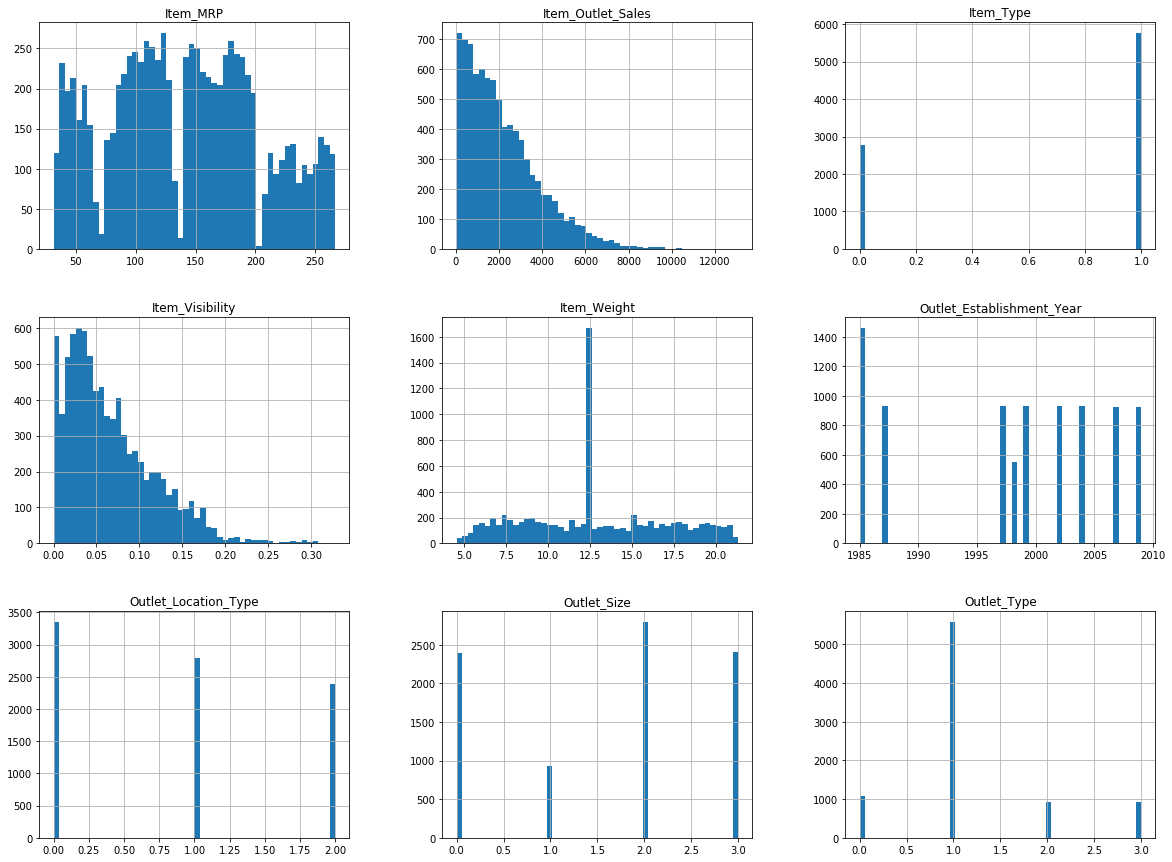

In [10]:
trainDfClean.hist(bins=50, figsize=(20,15));
plt.show();

In [33]:
X_train = trainDfClean.drop(["Item_Outlet_Sales"], axis=1).values
y_train = trainDfClean["Item_Outlet_Sales"].values
X_test = testDfClean.drop(["Item_Outlet_Sales"], axis=1).values
y_test = testDfClean["Item_Outlet_Sales"].values

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lreg = LinearRegression();
lreg.fit(X_train,y_train);
y_pred = lreg.predict(X_test);

In [35]:
mean_absolute_error(y_test, y_pred)

1017.6778612869437

In [36]:
mean_squared_error(y_test, y_pred)

1599790.0774630718

In [37]:
df = pd.DataFrame(list(zip(y_test, y_pred)), columns =['Actual', 'Predicted']) 
df.head(100)

,Actual,Predicted
0,1794.331,1849.892148
1,1794.331,1265.288073
2,1794.331,2289.287604
3,1794.331,2292.930401
4,1794.331,5121.067178
...,...,...
95,1794.331,898.477838
96,1794.331,1992.952332
97,1794.331,2839.656614
98,1794.331,2751.167112


## Bayesian Linear Regression

In [38]:
def add_intercept(X):
    X_new = np.ones((X.shape[0], X.shape[1] + 1), dtype=X.dtype)
    X_new[:, 1:] = X[:, :]
    return X_new


class BayesianLinearRegression:
    """
    Linear regression model: y = z beta[1] + beta[0]
    beta ~ N(0,Lambda)
    Lambda = I * lambda
    P(y|x,beta) ~ N(y|x.dot(beta),sigma**2)
    """

    def __init__(self, lamb=20., beta_mu=0, sigma=5, fit_intercept=True):
        """
        lamb: variance of the prior for each of the feature dimensions.
        beta_mu: the mean of the prior
        sigma: variance of the prediction error.
        """
        if not np.isscalar(lamb):
            self.inv_lamb = 1. / np.asarray(lamb)
        else:
            self.inv_lamb = 1. / float(lamb)
        if not np.isscalar(beta_mu):
            self.beta_mu = np.asarray(beta_mu)
        else:
            self.beta_mu = float(beta_mu)

        self.sigma = sigma
        self.fit_intercept = fit_intercept
        self.beta = None

    def fit_ml(self, X, y):
        """
          Fit a Maximum Likelihood estimate. (not Bayesian)
          X: features, n_samples by n_features nd-array
          y: target values, n_samples array
        """
        if self.fit_intercept:
            X = add_intercept(X)
        self.beta = linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

    def fit_map(self, X, y):
        """
          Fit a MAP estimate
          X: features, n_samples by n_features nd-array
          y: target values, n_samples array
        """
        if self.fit_intercept:
            X = add_intercept(X)
        # data setup
        f_dim = X.shape[1]
        if np.isscalar(self.inv_lamb):
            inv_lamb = np.diagflat(np.repeat(self.inv_lamb, f_dim))
        else:
            inv_lamb = np.diagflat(self.inv_lamb)
        if np.isscalar(self.beta_mu):
            beta_mu = np.repeat(self.beta_mu, f_dim)
        else:
            beta_mu = self.beta_mu
        sigma = self.sigma
        # let the actual calculation begin
        l = sigma ** 2 * inv_lamb
        s = linalg.inv(X.T.dot(X) + l)
        # adding in the mean of the prior
        b0 = sigma ** 2 * inv_lamb.dot(beta_mu)

        self.beta = s.dot(X.T.dot(y) + b0)

    def predict(self, X):
        """ Prediction """
        if self.fit_intercept:
            X = add_intercept(X)
        return X.dot(self.beta)

In [39]:
model = BayesianLinearRegression()

In [40]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [41]:
model.fit_map(X_train,y_train)
y_predictions = model.predict(X_test)

In [42]:
df = pd.DataFrame(list(zip(y_test, y_predictions)), columns =['Actual', 'Predicted']) 
df.head(100)

,Actual,Predicted
0,1794.331,1838.191471
1,1794.331,1271.368031
2,1794.331,2284.702917
3,1794.331,2296.661053
4,1794.331,5107.305066
...,...,...
95,1794.331,895.190439
96,1794.331,2002.151926
97,1794.331,2864.500194
98,1794.331,2750.002343


In [43]:
def mean_squared_error(y_true, y_pred):
    mse = np.square(np.subtract(y_true,y_pred)).mean() 
    return mse

In [44]:
print(f"Mean squared error :: {mean_squared_error(y_test, y_predictions)}")

Mean squared error :: 1597765.6317263527
